In [59]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

HOST = "localhost"
PORT = 4223
VC_UID = "KQz"
LC_UID = "23B3"
import time

from tinkerforge.ip_connection import IPConnection
from tinkerforge.bricklet_voltage_current_v2 import BrickletVoltageCurrentV2
from tinkerforge.bricklet_load_cell_v2 import BrickletLoadCellV2
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


ipcon = IPConnection()  # Create IP connection
vc = BrickletVoltageCurrentV2(VC_UID, ipcon)  # Create device object
lc = BrickletLoadCellV2(LC_UID, ipcon)  # Create device object
ipcon.connect(HOST, PORT)  # Connect to brickd

# Let's try and set up the Digilent

In [60]:
# from WF_SDK import device, static, supplies, error  # import instruments

# from time import sleep                              # needed for delays

# """-----------------------------------------------------------------------"""

# try:
#     # connect to the device
#     device_data = device.open()

#     """-----------------------------------"""

#     # start the positive supply
#     supplies_data = supplies.data()
#     supplies_data.master_state = True
#     supplies_data.state = True
#     supplies_data.voltage = 3.3
#     supplies.switch(device_data, supplies_data)

#     # set maximum current
#     if device_data.name == "Digital Discovery" or device_data.name == "Analog Discovery Pro 3X50":
#         print('are we in here?')
#         static.set_current(device_data, 16)

#     # set all pins as output
#     for index in range(16):
#         static.set_mode(device_data, index, True)

#     try:
#         while True:
#             # repeat
#             mask = 1
#             while mask < 0x10000:
#                 # go through possible states
#                 for index in range(16):
#                     # set the state of every DIO channel
#                     static.set_state(device_data, index, not(mask & pow(2, index)))
#                 sleep(0.1)  # delay
#                 mask <<= 1  # switch mask

#             while mask > 1:
#                 # go through possible states backward
#                 mask >>= 1  # switch mask
#                 for index in range(16):
#                     # set the state of every DIO channel
#                     static.set_state(device_data, index, not(mask & pow(2, index)))
#                 sleep(0.1)  # delay

#     except KeyboardInterrupt:
#         # stop if Ctrl+C is pressed
#         pass

#     finally:
#         # stop the static I/O
#         static.close(device_data)

#         # stop and reset the power supplies
#         supplies_data.master_state = False
#         supplies.switch(device_data, supplies_data)
#         supplies.close(device_data)

#         """-----------------------------------"""

#         # close the connection
#         device.close(device_data)

# except error as e:
#     print(e)
#     # close the connection
#     device.close(device.data)

In [61]:
# from WF_SDK import device, scope, wavegen, tools, error   # import instruments

# import matplotlib.pyplot as plt   # needed for plotting
# from time import sleep            # needed for delays

# """-----------------------------------------------------------------------"""

# try:
#     # connect to the device
#     device_data = device.open()

#     """-----------------------------------"""

#     # handle devices without analog I/O channels
#     if device_data.name != "Digital Discovery":

#         # initialize the scope with default settings
#         scope.open(device_data)

#         # set up triggering on scope channel 1
#         scope.trigger(device_data, enable=True, source=scope.trigger_source.analog, channel=1, level=0)

#         # generate a 10KHz sine signal with 2V amplitude on channel 1
#         wavegen.generate(device_data, channel=1, function=wavegen.function.sine, offset=0, frequency=10e03, amplitude=2)

#         sleep(1)    # wait 1 second

#         # record data with the scopeon channel 1
#         buffer = scope.record(device_data, channel=1)

#         # limit displayed data size
#         length = len(buffer)
#         if length > 10000:
#             length = 10000
#         buffer = buffer[0:length]

#         # generate buffer for time moments
#         time = []
#         for index in range(len(buffer)):
#             time.append(index * 1e03 / scope.data.sampling_frequency)   # convert time to ms

#         # plot
#         plt.plot(time, buffer)
#         plt.xlabel("time [ms]")
#         plt.ylabel("voltage [V]")
#         plt.show()

#         """-----------------------------------"""

#         # compute the spectrum from 0Hz to 100KHz
#         start_frequency = 0
#         stop_frequency = 100e03
#         spectrum = tools.spectrum(buffer, tools.window.flat_top, scope.data.sampling_frequency, start_frequency, stop_frequency)

#         # calculate frequency domain data
#         frequency = []
#         length = len(spectrum)
#         step = (stop_frequency - start_frequency) / (length - 1)
#         for index in range(length):
#             frequency.append((start_frequency + index * step) / 1e06)   # convert frequency in MHz
        
#         # plot
#         plt.plot(frequency, spectrum)
#         plt.xlabel("frequency [MHz]")
#         plt.ylabel("magnitude [dBV]")
#         plt.show()

#         """-----------------------------------"""

#         # reset the scope
#         scope.close(device_data)

#         # reset the wavegen
#         wavegen.close(device_data)

#     """-----------------------------------"""

#     # close the connection
#     device.close(device_data)

# except error as e:
#     print(e)
#     # close the connection
#     device.close(device.data)

# New experiment stuff

In [62]:
# from WF_SDK import device, scope, wavegen, tools, error   # import instruments
# from WF_SDK import static, supplies, error  


# # Dataframe to store readings
# df = pd.DataFrame(columns=["Time (ms)", "Voltage (mV)", "Current (mA)", "Force (Grams)"])
# fig, ax = plt.subplots()

# try:
#     device_data = device.open()
#     supplies_data = supplies.data()

#     # Turn on the power supply with initial settings
#     supplies_data.master_state = True
#     supplies_data.state = True
#     supplies_data.voltage = 3.3  # Initial voltage
#     supplies.switch(device_data, supplies_data)

#     # set maximum current
#     if device_data.name == "Digital Discovery" or device_data.name == "Analog Discovery Pro 3X50":
#         static.set_current(device_data, 16)

#     # set pin 0 as output
#     static.set_mode(device_data, 0, True)
#     static.set_state(device_data, 0, not(mask & pow(2, index)))

#     try:
#         while True:
#             # Output voltage control based on user input
            
#             # Read voltages
#             voltage = analog_in.statusData(0, 1)[0]  # Read channel 0
#             current = analog_in.statusData(1, 1)[0]  # Read channel 1

#             total_time = (time.time_ns() // 1_000_000) - STARTING_TIME
#             new_row = {
#                 "Time (ms)": total_time,
#                 "Voltage (mV)": voltage * 1000,  # Convert to mV
#                 "Current (mA)": current * 1000,  # Convert to mA
#                 "Force (Grams)": force  # Placeholder for actual force reading
#             }
#             df = df.append(new_row, ignore_index=True)

#             # Update plot
#             ax.clear()
#             ax.plot(df["Time (ms)"], df["Voltage (mV)"], label="Voltage (mV)")
#             ax.plot(df["Time (ms)"], df["Current (mA)"], label="Current (mA)")
#             ax.legend(loc="upper right")
#             ax.set_xlabel("Time (ms)")
#             ax.set_ylabel("Measurement Units")
#             ax.set_title("Real-time Data Monitoring")
#             display(fig)
#             clear_output(wait=True)
            
#     except KeyboardInterrupt:
#         # stop if Ctrl+C is pressed
#         pass

#     finally:
#         # stop the static I/O
#         static.close(device_data)

#         # stop and reset the power supplies
#         supplies_data.master_state = False
#         supplies.switch(device_data, supplies_data)
#         supplies.close(device_data)

#         """-----------------------------------"""

#         # close the connection
#         device.close(device_data)

# except error as e:
#     print(e)
#     # close the connection
#     device.close(device.data)

# Old experiment stuff

In [96]:
SAVE_FILENAME = "23.04.24_polypyrrole_Fourth_Try.csv"

In [97]:
import plotly.graph_objects as go
import pandas as pd
import os

if os.path.exists(SAVE_FILENAME):
    df = pd.read_csv(SAVE_FILENAME)
    
    # Create traces for each measurement
    trace_voltage = go.Scatter(
        x=df['Time (ms)'],
        y=df['Voltage (mV)'],
        mode='lines',
        name='Voltage (mV)'
    )
    
    trace_current = go.Scatter(
        x=df['Time (ms)'],
        y=df['Voltage (mA)'],
        mode='lines',
        name='Current (mA)'
    )
    
    trace_force = go.Scatter(
        x=df['Time (ms)'],
        y=-df['Force (mGrams)'],
        mode='lines',
        name='Force (mGrams)'
    )
    
    # Create the layout for the plot
    layout = go.Layout(
        title='Measurements Over Time',
        xaxis=dict(
            title='Time (ms)',
            # type='log',
            autorange=True
        ),
        yaxis=dict(
            title='Measurement Units',
            # type='symlog',
            autorange=True
        ),
        legend=dict(
            title='Parameter'
        )
    )
    
    # Create the figure and add traces
    fig = go.Figure(data=[trace_voltage, trace_current, trace_force], layout=layout)
    
    # Display the plot
    fig.show()
else:
    pass


In [65]:
# import seaborn as sns
# import os

# if os.path.exists(SAVE_FILENAME):
#     df = pd.read_csv(SAVE_FILENAME)
#     plt.figure(figsize=(12, 8))  # Set the figure size for better readability

#     # Plotting each measurement
#     sns.lineplot(x='Time (ms)', y='Voltage (mV)', data=df, label='Voltage (mV)')
#     sns.lineplot(x='Time (ms)', y='Voltage (mA)', data=df, label='Current (mA)')
#     sns.lineplot(x='Time (ms)', y='Force (Grams)', data=df, label='Force (Grams)')

#     plt.title('Measurements Over Time')  # Add a title
#     plt.xlabel('Time (ms)')  # Label for the x-axis
#     plt.ylabel('Measurement Units')  # Label for the y-axis
#     plt.legend(title='Parameter')  # Add a legend with a title
#     plt.grid(True)  # Add gridlines for better readability

#     plt.show()  # Display the plot

# else:
#     pass

## TODO: calibrate!

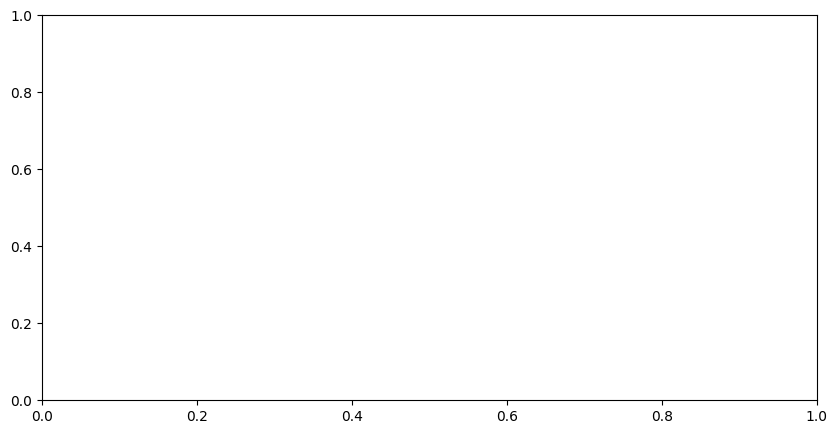

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.ion()

STARTING_LOAD = lc.get_weight()
STARTING_TIME = time.time_ns() // 1_000_000
df = pd.DataFrame(columns = ['Time (ms)', 'Voltage (mV)', 'Voltage (mA)', 'Force (mGrams)'])

In [86]:
wait_time = 0.01
while True:
    total_time = (time.time_ns() // 1_000_000) - STARTING_TIME

    voltage = vc.get_voltage()
    current = vc.get_current()
    force = lc.get_weight() - STARTING_LOAD
    new_row = pd.DataFrame(
        {
            "Time (ms)": [total_time],
            "Voltage (mV)": [voltage],
            "Voltage (mA)": [current],
            "Force (mGrams)": [force],
        }
    )

    # Use concat instead of append
    df = pd.concat([df, new_row], ignore_index=True)

    ax.clear()  # Clear previous plot
    ax.plot(df["Time (ms)"], df["Voltage (mV)"], label="Voltage (mV)")
    ax.plot(df["Time (ms)"], df["Voltage (mA)"], label="Current (mA)")
    ax.plot(df["Time (ms)"], df["Force (mGrams)"], label="Force (mGrams)")
    ax.legend(loc="upper right")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Measurement Units")
    ax.set_title("Real-time Data Monitoring")

    # Set the y-axis to symlog scale
    ax.set_yscale('symlog', linthresh=1.0)

    # Adjust the y-axis tick labels
    y_ticks = ax.get_yticks()
    y_tick_labels = [f'{abs(tick):.2f}' if tick != 0 else '0' for tick in y_ticks]
    ax.set_yticklabels(y_tick_labels)

    display(fig)
    clear_output(wait=True)
    time.sleep(wait_time)

    df.to_csv(SAVE_FILENAME)

/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_36223/472664143.py:35: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



KeyboardInterrupt: 

In [ ]:
# Use concat instead of append
df = pd.concat([df, new_row], ignore_index=True)

ax.clear()  # Clear previous plot
ax.plot(df["Time (ms)"], df["Voltage (mV)"], label="Voltage (mV)")
ax.plot(df["Time (ms)"], df["Voltage (mA)"], label="Current (mA)")
ax.plot(df["Time (ms)"], df["Force (Grams)"], label="Force (Grams)")
ax.legend(loc="upper right")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Measurement Units")
ax.set_title("Real-time Data Monitoring")
plt.show()